In [22]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

DATA_PATH = 'C:/Users/MJ/Desktop/MyValue/NLP/Model/data/' #데이터경로 설정
print('파일 크기: ')
for file in os.listdir(DATA_PATH):
    if 'txt' in file:
        print(file.ljust(30)+str(round(os.path.getsize(DATA_PATH+ file) / 100000,2))+'MB')

파일 크기: 
DATASET.txt                   121.96MB


In [25]:
#트레인 파일 불러오기
train_data = pd.read_csv(DATA_PATH + 'DATASET.txt', header = 0, delimiter = '\t', quoting=3, encoding='cp949')
train_data.head()

,num,발화,감정
0,1,퇴사한 지 얼마 안 됐지만 천천히 직장을 구해보려고.더 좋은 회사가 기다리고 있을지...,기쁨
1,2,요즘 직장생활이 너무 편하고 좋은 것 같아!우리 회사는 복지가 정말 좋아! 내가 곧...,기쁨
2,3,취업해야 할 나이인데 취업하고 싶지가 않아.아직 조금 더 놀고 싶은 마음이 커. 인...,기쁨
3,4,우리 회사는 정말 사내 분위기가 좋아.즐거운 일이 매일 생길 거 같은 기분이야. 내...,기쁨
4,5,오늘 내가 다니는 회사가 참 좋은 직장이라는 생각이 들었어.회사에서 내가 제안한 프...,기쁨


In [26]:
print('학습데이터 전체 개수: {}'.format(len(train_data)))

학습데이터 전체 개수: 85532


In [29]:
#리뷰 전체길이 확인
train_length = train_data['발화'].astype(str).apply(len)
train_length.head()

0     65
1     85
2     68
3     71
4    118
Name: 발화, dtype: int64

In [30]:
#리뷰 통계 정보
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length,25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length,75)))

리뷰 길이 최댓값: 307
리뷰 길이 최솟값: 2
리뷰 길이 평균값: 75.09
리뷰 길이 표준편차: 42.97
리뷰 길이 중간값: 82.0
리뷰 길이 제1사분위: 30.0
리뷰 길이 제3사분위: 109.0


In [32]:
# 문자열 아닌 데이터 모두 제거
train_review = [review for review in train_data['발화'] if type(review) is str]
train_review

['퇴사한 지 얼마 안 됐지만 천천히 직장을 구해보려고.더 좋은 회사가 기다리고 있을지도 모르는데 쉬고 있기가 좀 그래.',
 '요즘 직장생활이 너무 편하고 좋은 것 같아!우리 회사는 복지가 정말 좋아! 내가 곧 출산하게 되는데 육아휴직 기간도 긴 데다가 소정의 지원금도 제공해줘!',
 '취업해야 할 나이인데 취업하고 싶지가 않아.아직 조금 더 놀고 싶은 마음이 커. 인생은 긴데 꼭 빨리 취업해야 할까 싶어.',
 '우리 회사는 정말 사내 분위기가 좋아.즐거운 일이 매일 생길 거 같은 기분이야. 내가 원하는 진로로 취업해서 더 그런 거 같아.',
 '오늘 내가 다니는 회사가 참 좋은 직장이라는 생각이 들었어.회사에서 내가 제안한 프로젝트를 항상 긍정적으로 검토해주시고 의견에 귀를 기울여주시거든. 이렇게 서로 존중하면서 소통할 수 있는 우리 회사가 아주 좋아.',
 '회사에서 전공시험을 봤어. 오늘 시험 결과가 나왔어.열심히 준비한 만큼 원하던 점수가 나왔어.',
 '오늘 입사 면접을 봤어.면접을 잘 본 것 같아! 그 회사에 취업할 수 있겠어.',
 '회사에서 나를 참 신뢰하는 것 같아. 그건 기분이 좋아.당연히 내가 업무를 잘 처리해서지. 그런데 내가 잘해선지 일이 자꾸 늘어나네? ',
 '먼저 취업한 선배가 면접 비결을 알려줬어. 곧 면접 보러 가는데 든든해.면접 볼 때 태도 같은 일반적인 거야. 하지만 그렇게 나를 챙겨주는 사람이 있다는 게 든든해.',
 '직장 상사로부터 칭찬을 받았는데 너무 신이 나!다른 사람이 실수한 일을 내가 깔끔하게 처리해서 칭찬을 받았어.',
 '취업해서 너무 신이 나!나는 월급을 받아서 부모님께 용돈을 드리고 싶어!',
 '오늘 사장님께 칭찬받아서 매우 기뻐.전 직원 앞에서 내 이름을 부르셨거든. 앞으로도 일을 열심히 해야겠어.',
 '지난주에 정말 가고 싶던 회사에 원서 접수했는데 합격했어. 매우 기뻐.응. 이제 면접만 합격하면 돼. 열심히 준비해서 꼭 합격할 거야.',
 '나 드디어 원하는 회사에 취업했어!그동안 취업을 못 

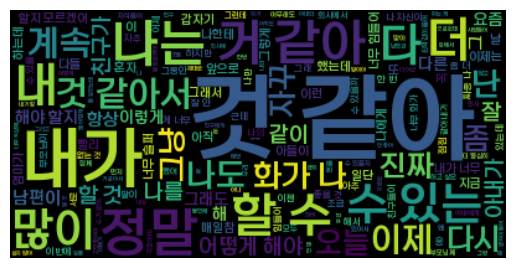

In [34]:
# 한글 폰트 설정(.ttf파일 다운로드 후 실행)
wordcloud = WordCloud(DATA_PATH+'ROKAF Sans Medium.ttf').generate(' '.join(train_review))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
#긍정 1, 부정 0
print('불안 리뷰 갯수: {}'.format(train_data['감정'].value_counts()[0]))
print('슬픔 리뷰 갯수: {}'.format(train_data['감정'].value_counts()[1]))
print('분노 리뷰 갯수: {}'.format(train_data['감정'].value_counts()[2]))
print('기쁨 리뷰 갯수: {}'.format(train_data['감정'].value_counts()[3]))
print('중립 리뷰 갯수: {}'.format(train_data['감정'].value_counts()[4]))

불안 리뷰 갯수: 25704
슬픔 리뷰 갯수: 25540
분노 리뷰 갯수: 16082
기쁨 리뷰 갯수: 13376
중립 리뷰 갯수: 4830
